In [148]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
#so that plots can be seen on notebook also known as magic function

In [149]:
# getting the data
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")

In [150]:
train.shape

(5686, 25)

In [151]:
test.shape

(2438, 24)

In [152]:
train.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
radius                       int64
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
weight                       int64
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [153]:
train['class'].unique() ## target

array(['p', 'e'], dtype=object)

In [154]:
# seperating categorical and numerical data from our training data set and droping class variable,it will be
# treated later

cat=train.select_dtypes(['object'])
cat.drop(['class'],axis=1,inplace=True)
num=train.select_dtypes(['int'])

#test
cat_t=test.select_dtypes(['object'])
num_t=test.select_dtypes(['int'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [155]:
cat.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,f,s,e,f,s,f,c,n,b,t,...,k,p,w,p,w,o,e,w,v,l
1,x,y,w,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,n,v,u
2,f,s,n,t,n,f,c,b,e,e,...,s,e,e,p,w,t,e,w,c,w
3,x,s,e,f,y,f,c,n,b,t,...,s,p,w,p,w,o,e,w,v,l
4,x,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,s,m


In [156]:
cat_t.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,s,p,g,p,w,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,k,b,b,p,w,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,s,w,w,p,w,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,k,n,b,p,w,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,s,w,w,p,w,o,p,k,n,m


In [157]:
num_t.head()

,radius,weight
0,32,23
1,7,23
2,2,24
3,2,53
4,10,24


In [158]:
num.head()

,radius,weight
0,215,38
1,94,43
2,244,37
3,286,82
4,110,36


In [159]:
from sklearn import preprocessing

In [160]:
#missing values
#train
train.isnull().any()



class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
radius                      False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
weight                      False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [161]:
#test
test.isnull().any()

cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
radius                      False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
weight                      False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

In [162]:
# missing value treatment of weight
train['weight'].fillna(train['weight'].median(),inplace=True)
train['weight'].isnull().any()

False

In [163]:
cat.columns

Index([u'cap-shape', u'cap-surface', u'cap-color', u'bruises', u'odor',
       u'gill-attachment', u'gill-spacing', u'gill-size', u'gill-color',
       u'stalk-shape', u'stalk-root', u'stalk-surface-above-ring',
       u'stalk-surface-below-ring', u'stalk-color-above-ring',
       u'stalk-color-below-ring', u'veil-type', u'veil-color', u'ring-number',
       u'ring-type', u'spore-print-color', u'population', u'habitat'],
      dtype='object')

In [164]:
import seaborn as sns

6.88126669844


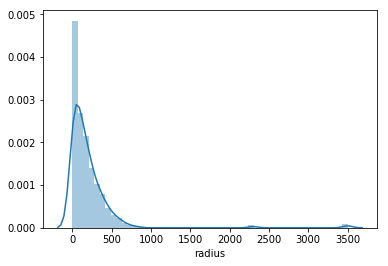

In [165]:
# step :checking skewness of numerical variables

print num['radius'].skew()
sns.distplot(num['radius']) #skewed

1.39759932548


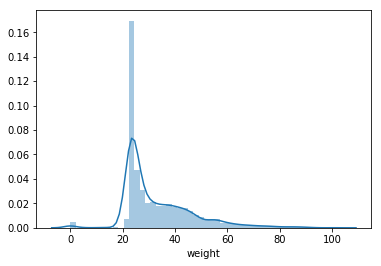

In [166]:
print num['weight'].skew()
sns.distplot(num['weight']) 

-0.814867692072


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


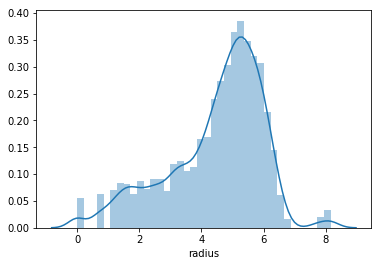

In [167]:
# Log tranformation
# 
num['radius']=np.log(num['radius'])
print num['radius'].skew()
sns.distplot(num['radius'])


1.49162066129


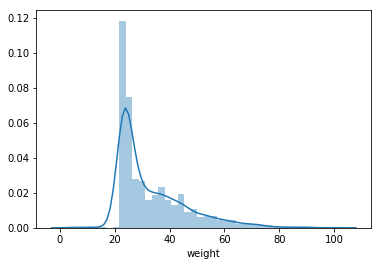

In [168]:
#test
print num_t['weight'].skew()
sns.distplot(num_t['weight'])

-1.0038982895


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


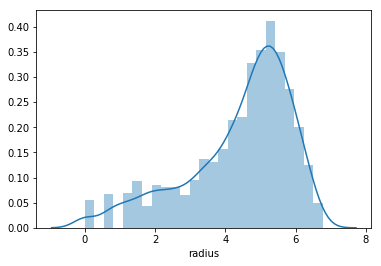

In [169]:
num_t['radius']=np.log(num_t['radius'])
print num_t['radius'].skew()
sns.distplot(num_t['radius'])


In [170]:
#check for class imbalance
train[train['class']=='p'].count()

class                       2741
cap-shape                   2741
cap-surface                 2741
cap-color                   2741
bruises                     2741
odor                        2741
gill-attachment             2741
gill-spacing                2741
gill-size                   2741
gill-color                  2741
stalk-shape                 2741
stalk-root                  2741
radius                      2741
stalk-surface-above-ring    2741
stalk-surface-below-ring    2741
stalk-color-above-ring      2741
stalk-color-below-ring      2741
veil-type                   2741
veil-color                  2741
weight                      2741
ring-number                 2741
ring-type                   2741
spore-print-color           2741
population                  2741
habitat                     2741
dtype: int64

In [171]:
train[train['class']=='e'].count()

class                       2945
cap-shape                   2945
cap-surface                 2945
cap-color                   2945
bruises                     2945
odor                        2945
gill-attachment             2945
gill-spacing                2945
gill-size                   2945
gill-color                  2945
stalk-shape                 2945
stalk-root                  2945
radius                      2945
stalk-surface-above-ring    2945
stalk-surface-below-ring    2945
stalk-color-above-ring      2945
stalk-color-below-ring      2945
veil-type                   2945
veil-color                  2945
weight                      2945
ring-number                 2945
ring-type                   2945
spore-print-color           2945
population                  2945
habitat                     2945
dtype: int64

In [172]:
# analyzing category variables
cat.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686,...,5686,5686,5686,5686,5686,5686,5686,5686,5686,5686
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,2578,2295,1600,3298,2487,5552,4769,3929,1200,3224,...,3463,3122,3075,5686,5557,5227,2788,1682,2814,2227


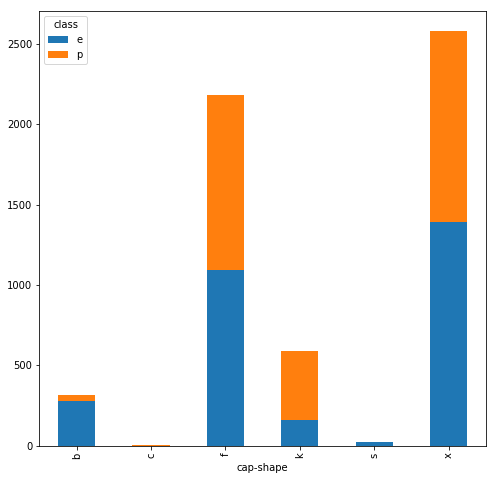

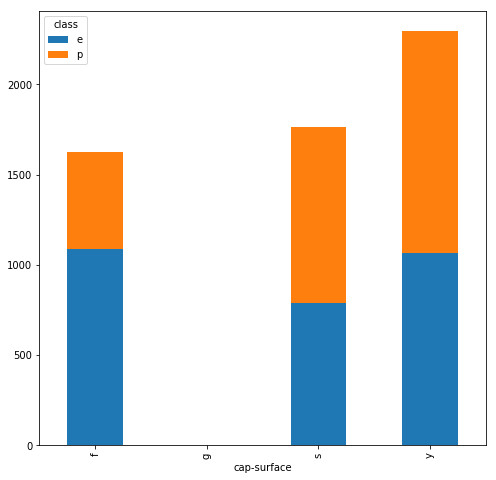

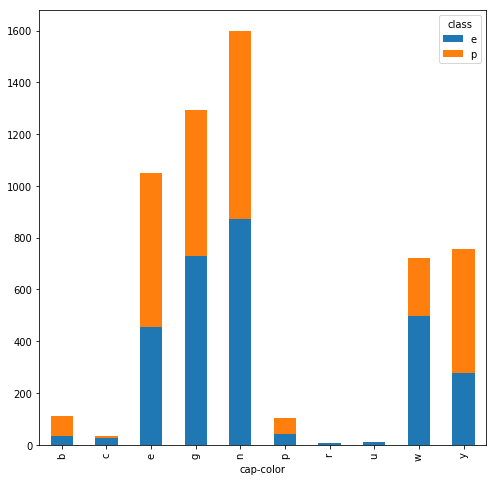

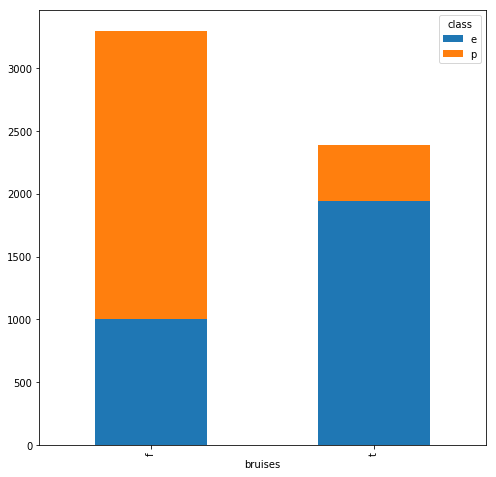

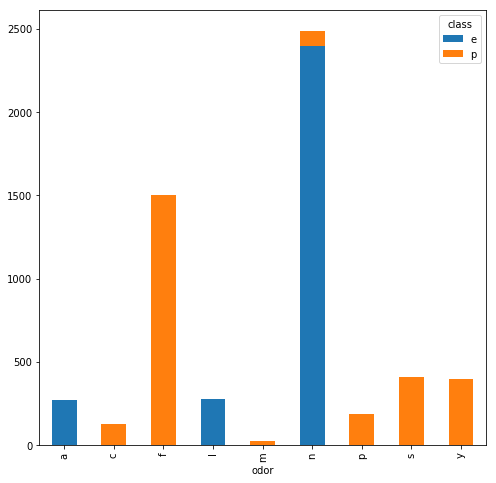

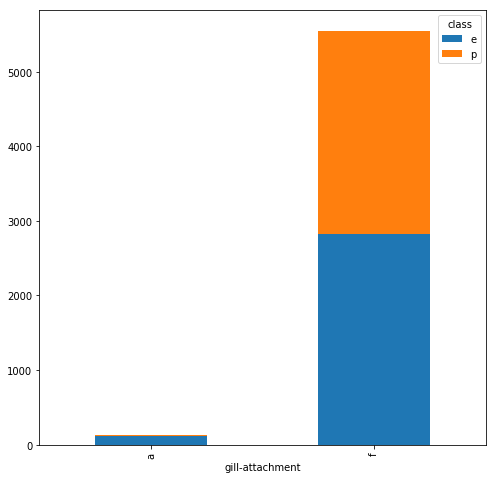

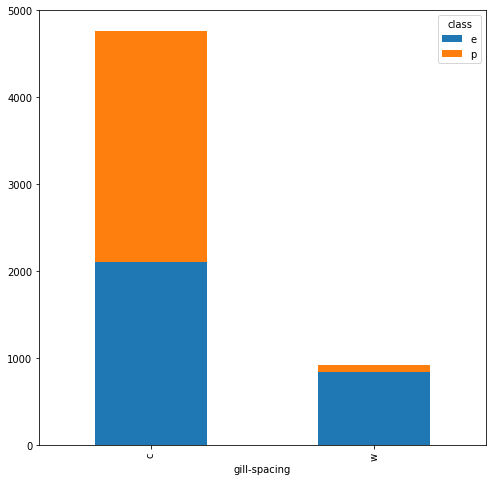

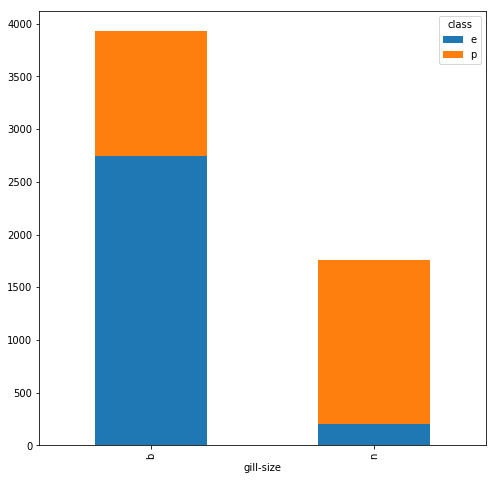

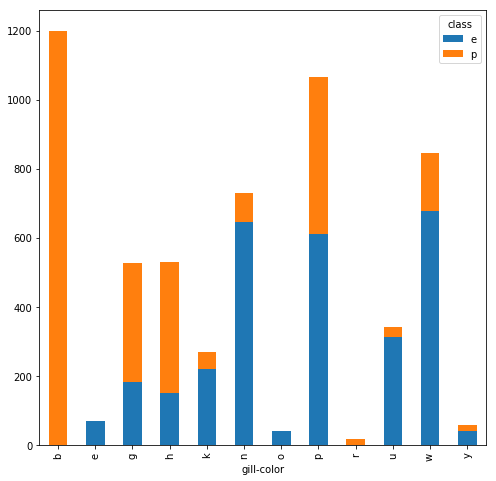

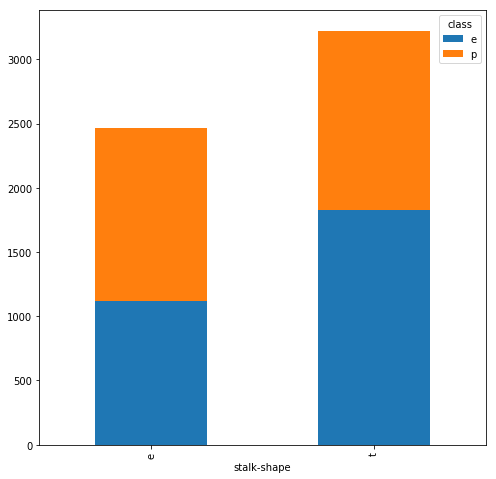

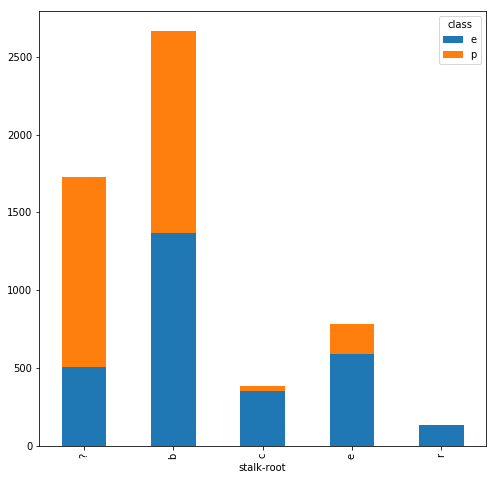

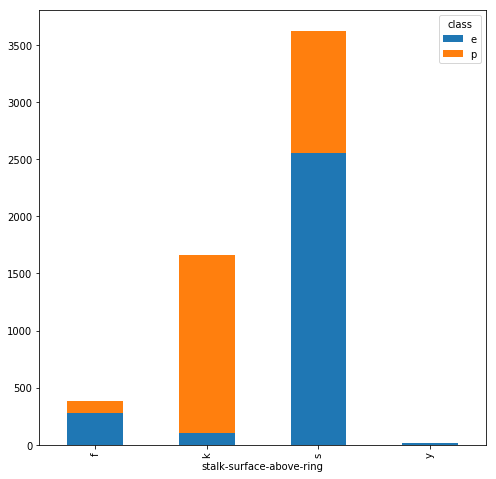

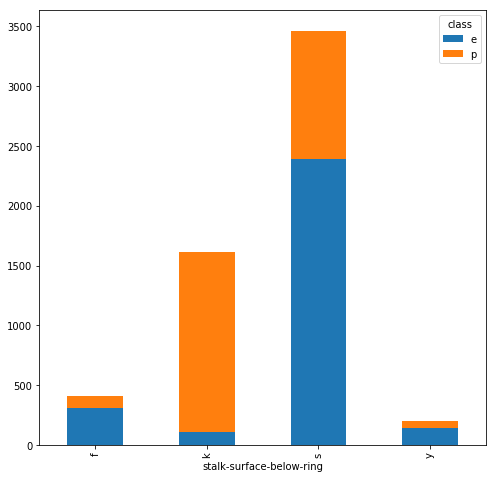

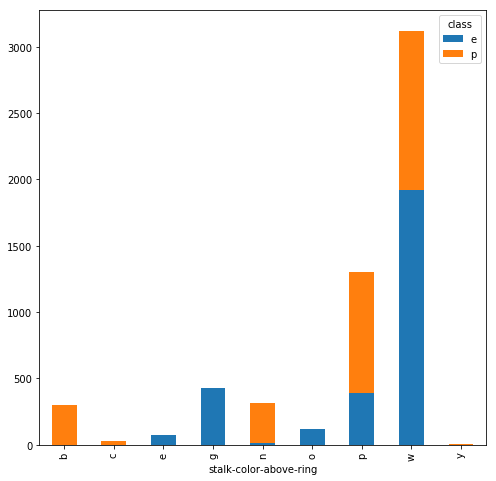

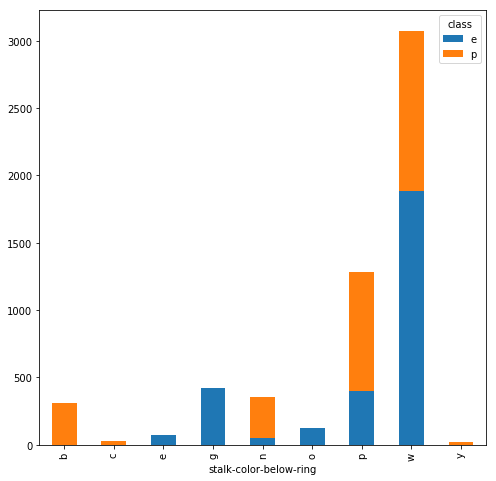

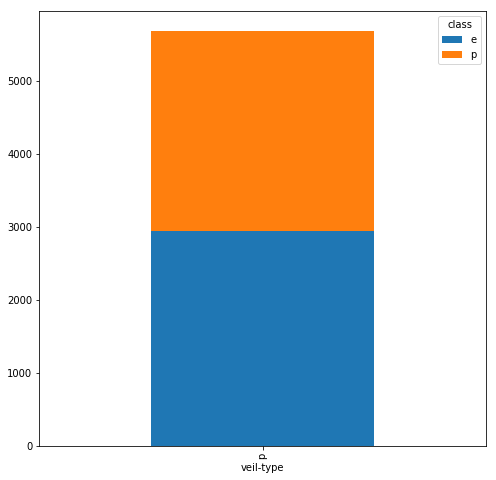

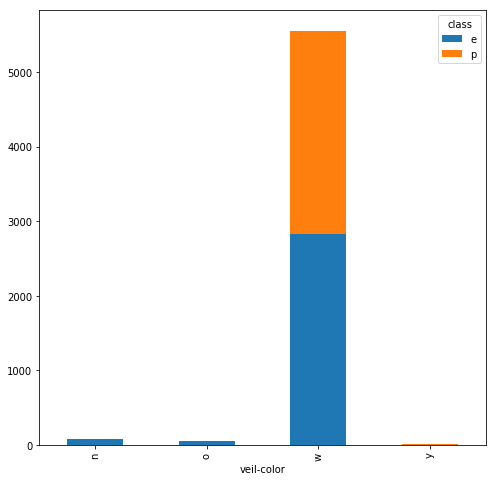

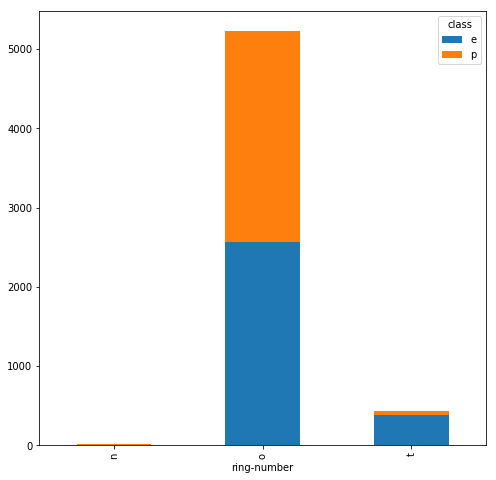

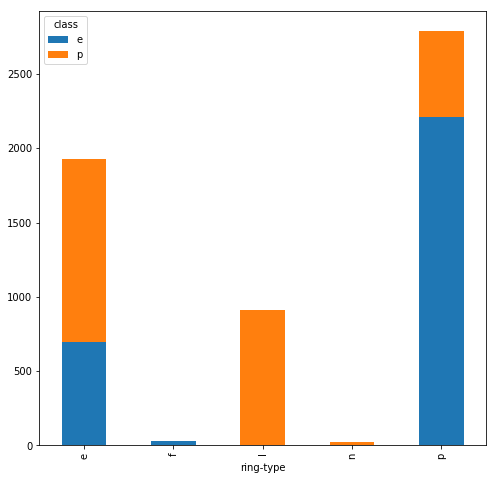

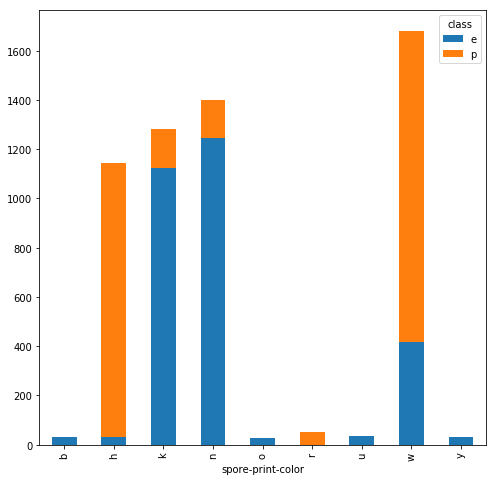

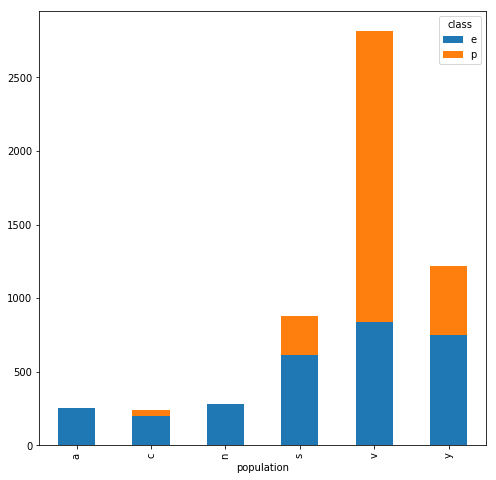

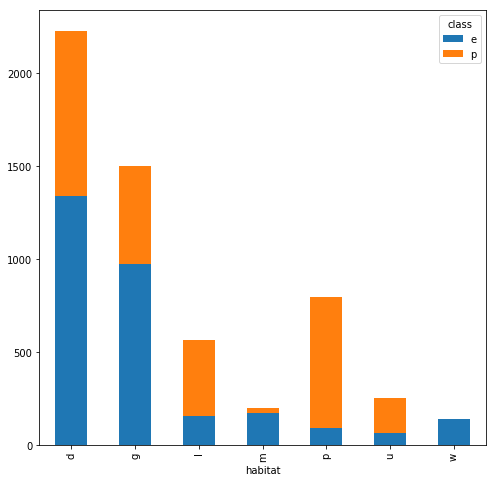

In [173]:
#bivarient analysis

for index in cat:
    clarity_color_table = pd.crosstab(index=train[index], 
                          columns=train["class"])

    clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
   


In [174]:
#converting categorical variables into numeric
#steps:LabelEncoding--->OneHotEncoding

#labelEncoding

le=preprocessing.LabelEncoder()
cat=cat.apply(le.fit_transform)
cat.head()





,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,2
1,5,3,8,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,3,4,5
2,2,2,4,1,5,1,0,0,1,0,...,2,2,2,0,2,2,0,7,1,6
3,5,2,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2
4,5,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,3,3


In [175]:
#test
cat_t=cat_t.apply(le.fit_transform)
cat_t.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,4,0,3,1,5,1,0,0,9,1,...,2,6,3,0,2,1,4,2,5,0
1,4,2,3,0,2,1,0,0,2,0,...,1,0,0,0,2,1,2,1,4,0
2,0,1,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,3,3
3,1,2,9,0,2,1,0,0,7,0,...,1,4,0,0,2,1,2,1,5,0
4,0,2,9,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,3


In [176]:
#creating one hot encoder
# 1. INSTANTIATE
hot_enc=preprocessing.OneHotEncoder()
hot_enc_t=preprocessing.OneHotEncoder()

# 2. FIT
hot_enc.fit(cat)
hot_enc_t.fit(cat_t)

# 3. Transform
cat = hot_enc.transform(cat).toarray()
cat_t= hot_enc.transform(cat_t).toarray()

cat=pd.DataFrame(data=cat)
cat.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [177]:
cat_t=pd.DataFrame(data=cat_t)
cat_t.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [180]:
#merging numerical and categorical dataframes to get the final dataframe.
#train
num.reset_index(drop=True, inplace=True)
cat.reset_index(drop=True, inplace=True)
data=pd.concat([cat,num], axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,radius,weight
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.370638,38
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.543295,43
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.497168,37
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.655992,82
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.700480,36


In [181]:
#test
num_t.reset_index(drop=True, inplace=True)
cat_t.reset_index(drop=True, inplace=True)
data_t=pd.concat([cat_t,num_t], axis=1)
data_t.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,radius,weight
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.465736,23
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.945910,23
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.693147,24
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,53
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.302585,24


In [182]:
data.shape

(5686, 119)

In [183]:
data_t.shape

(2438, 119)

In [184]:
# cross validation
from sklearn.cross_validation import cross_val_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

In [185]:
#converting our target variable i.e class from categoric to binary.
ma={"p":0,"e":1}
train['class']=train['class'].map(ma)
X=data
X_t=data_t
Y=train['class']

In [186]:
#using test-train spilt method

from sklearn.cross_validation import train_test_split

In [187]:
#splitting the data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
X_train.shape

(4264, 119)

In [188]:
#imports for classifiers and metrics for getting accuracy score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [189]:
#define models
model1 = KNeighborsClassifier(n_neighbors=10)
model2=xgb.XGBClassifier()
model3=RandomForestClassifier(n_jobs=2)
model4=LogisticRegression()
mapp={'1':model1,'2':model2,'3':model3,'4':model4}

In [190]:
# getting score using test_train split
# for every model
for i in range(1,5):
    model=mapp[str(i)]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    print metrics.accuracy_score(Y_test,y_pred)

0.979606188467
1.0
1.0
1.0


In [191]:
# using K-fold cross validation with k=10(standard)
# cross validation gives better out-of-sample accuracy than test_train_split

for i in range(1,5):
    model=mapp[str(i)]
    score=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
    print score.mean()

0.980127277556
1.0
1.0
1.0


In [192]:
# we will use RandomForestClassifier
# firstly we will train our data on whole training dataset
model3.fit(X,Y)
Y_pred=model.predict(X_t)
df=pd.DataFrame(Y_pred)
df

,0
0,1
1,0
2,1
3,0
4,1
5,0
6,0
7,1
8,1
9,0


In [193]:
#getting final csv file

result = pd.concat([test, df], axis=1, join='inner')
result=result.rename(columns = {0:'class'})


In [194]:
ma={0:"p",1:"e"}
result['class']=result['class'].map(ma)
result

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,f,g,t,n,f,c,b,u,t,...,g,p,w,23,o,p,k,y,d,e
1,x,y,g,f,f,f,c,b,g,e,...,b,p,w,23,o,l,h,v,d,p
2,b,s,w,t,a,f,c,b,w,e,...,w,p,w,24,o,p,k,s,m,e
3,f,y,y,f,f,f,c,b,p,e,...,b,p,w,53,o,l,h,y,d,p
4,b,y,y,t,a,f,c,b,w,e,...,w,p,w,24,o,p,k,n,m,e
5,f,f,y,f,f,f,c,b,h,e,...,b,p,w,23,o,l,h,y,d,p
6,x,f,p,f,c,f,c,n,n,e,...,w,p,w,24,o,p,n,s,d,p
7,k,s,n,f,n,a,c,b,n,e,...,o,p,o,24,o,p,b,v,l,e
8,f,y,n,t,n,f,c,b,p,t,...,w,p,w,23,o,p,n,v,d,e
9,f,s,w,t,f,f,c,b,h,t,...,w,p,w,23,o,p,h,v,u,p


In [195]:
result.to_csv("DSG_sol.csv",index=False)